<a href="https://colab.research.google.com/github/johnjustine5646/AML_Labs_Trisem2/blob/main/Lab1_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing the dataset
df=pd.read_csv('/content/Program_1_Dataset.csv')
df.head()# shows the top 4 rows for an overview

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
df.columns #shows all the columns in the dataset

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [6]:
df.describe()#shows the statisticla overview of the numerical columns


,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.dtypes #looking at the datatypes helps you figure out whether your attribute is categotrical or numerical, figuring that out will help you perform different preprocessing techniques like outlier removal and label encoding

Crime_Rate          float64
Zone_proportion     float64
Non_Retail_Acres    float64
CHAS                  int64
NOX                 float64
Avg_rooms           float64
AGE                 float64
Distance            float64
RAD                   int64
Property_TaxRate      int64
PTRATIO             float64
B                   float64
LSTAT               float64
MValue              float64
dtype: object

In [8]:
df=pd.DataFrame(df) #changing to dataframe #just in case

According to question number 1, we are supposed to take Avg_rooms column as independent variable. Just to see what the distribution of the columnm, it was plotted.

<Axes: ylabel='Frequency'>

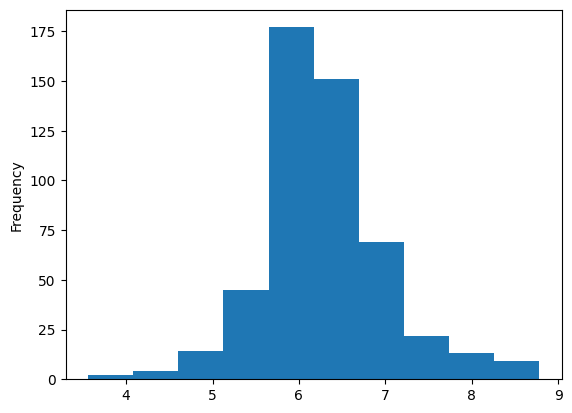

In [9]:
df['Avg_rooms '].plot(kind='hist')   #the data has a normal distribution

# 2nd Question
We were asked to plot the inpendent variable against the dependent variable i.e. Avg_rooms-MValue.

<function matplotlib.pyplot.show(close=None, block=None)>

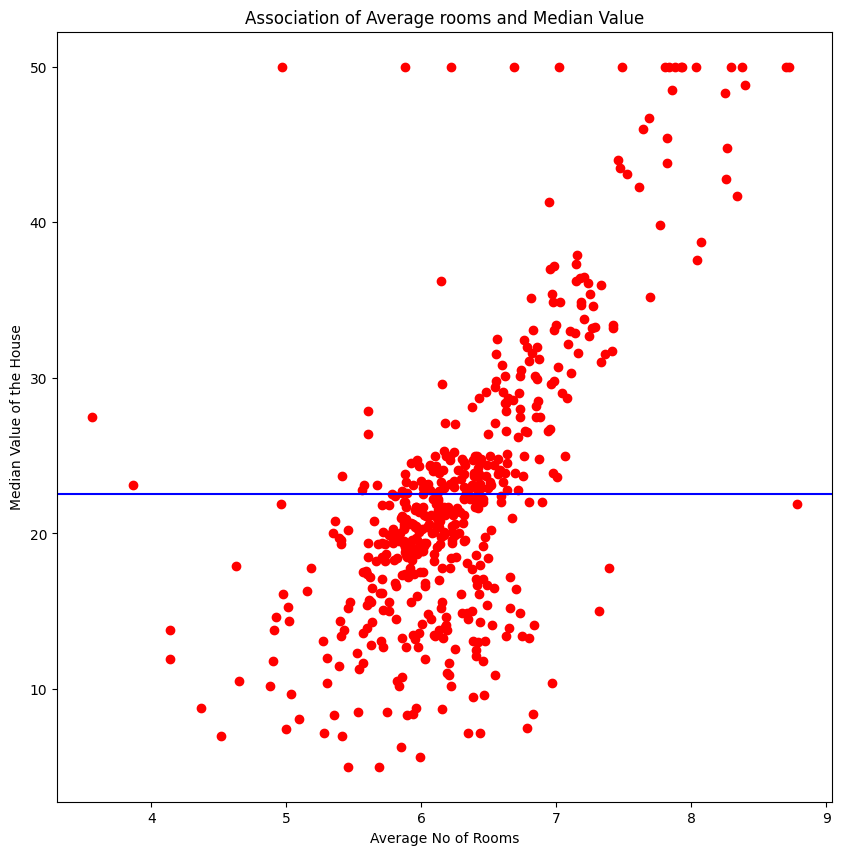

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df['Avg_rooms '],df['MValue'], color=['red'])
plt.axhline(y=df['MValue'].mean(),color='blue')
plt.title('Association of Average rooms and Median Value')
plt.annotate("Average Median Value",xy=(1, df['MValue'].sum()+2.5))
plt.xlabel('Average No of Rooms')
plt.ylabel('Median Value of the House')
plt.show

We can we see a positive correlation betweeen them and thus it is a good predictor of the median home value.




### Different model for prediction
As disscused in class, we build our own models to findout whether they will be good or not.
But the chosen intercept and coefficient are totally random, so they are way off and the error is too high.

In [11]:
model1=df['MValue'].mean()
model2=1+4.3*df['Avg_rooms ']
model3=2+3.2*df['Avg_rooms ']
df['model1']=model1
df['model2']=model2
df['model3']=model3

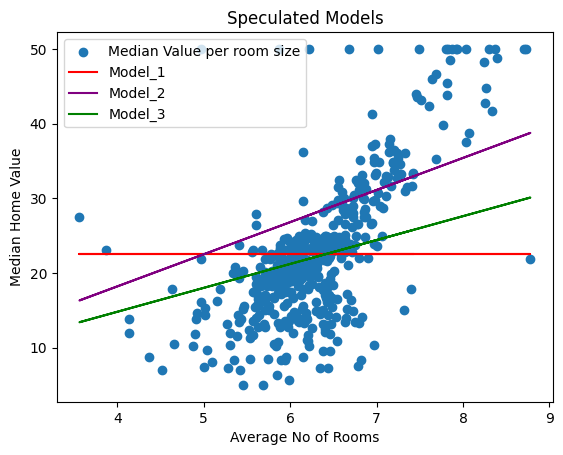

In [12]:
fig, ax=plt.subplots()
#plotting actual minutes
ax.scatter(x='Avg_rooms ',y='MValue',data=df,label='Median Value per room size')
ax.plot(df['Avg_rooms '],df['model1'],color='red',label='Model_1')

ax.plot(df['Avg_rooms '],df['model2'],color='purple',label='Model_2')

ax.plot(df['Avg_rooms '],df['model3'],color='green',label='Model_3')

ax.set_ylabel('Median Home Value')
ax.set_xlabel('Average No of Rooms')
ax.set_title('Speculated Models')
ax.legend()


In [13]:
model1_obs=pd.DataFrame({
    'Average No Rooms':df['Avg_rooms '],
    'Actual':df['Avg_rooms '],
    'Predicted':df['model1'],
    'Error':df['model1']-df['Avg_rooms ']
})
model1_obs

,Average No Rooms,Actual,Predicted,Error
0,7.416,7.416,22.532806,15.116806
1,6.727,6.727,22.532806,15.805806
2,6.781,6.781,22.532806,15.751806
3,6.405,6.405,22.532806,16.127806
4,6.137,6.137,22.532806,16.395806
...,...,...,...,...
501,5.854,5.854,22.532806,16.678806
502,6.459,6.459,22.532806,16.073806
503,6.341,6.341,22.532806,16.191806
504,6.251,6.251,22.532806,16.281806


In [14]:
model2_obs=pd.DataFrame({
    'Average No Rooms':df['Avg_rooms '],
    'Actual':df['Avg_rooms '],
    'Predicted':df['model2'],
    'Error':df['model2']-df['Avg_rooms ']
})
model2_obs

,Average No Rooms,Actual,Predicted,Error
0,7.416,7.416,32.8888,25.4728
1,6.727,6.727,29.9261,23.1991
2,6.781,6.781,30.1583,23.3773
3,6.405,6.405,28.5415,22.1365
4,6.137,6.137,27.3891,21.2521
...,...,...,...,...
501,5.854,5.854,26.1722,20.3182
502,6.459,6.459,28.7737,22.3147
503,6.341,6.341,28.2663,21.9253
504,6.251,6.251,27.8793,21.6283


In [15]:
model3_obs=pd.DataFrame({
    'Average No Rooms':df['Avg_rooms '],
    'Actual':df['Avg_rooms '],
    'Predicted':df['model3'],
    'Error':df['model3']-df['Avg_rooms ']
})
model3_obs

,Average No Rooms,Actual,Predicted,Error
0,7.416,7.416,25.7312,18.3152
1,6.727,6.727,23.5264,16.7994
2,6.781,6.781,23.6992,16.9182
3,6.405,6.405,22.4960,16.0910
4,6.137,6.137,21.6384,15.5014
...,...,...,...,...
501,5.854,5.854,20.7328,14.8788
502,6.459,6.459,22.6688,16.2098
503,6.341,6.341,22.2912,15.9502
504,6.251,6.251,22.0032,15.7522


In [16]:
X=df['Avg_rooms '].values
y=df['MValue'].values

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [18]:
model=LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
len(y_pred)
len(y_train)

354

In [21]:
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

In [22]:
print(f'Coefficient:{coefficient}')
print(f'Intercept:{intercept}')

Coefficient:8.926202222337784
Intercept:-33.510147597513345


*The coefficient of 8.926 represents the
change in the dependent variable for a one-unit change in the independent variable.

*The intercept of -33.510147 is the value of the dependent variable when all independent variables are zero.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

y_pred=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')

Training Set Metrics:
Mean Squared Error: 47.81170547959663
R-squared: 0.46176397399316227

Testing Set Metrics:
Mean Squared Error: 33.853804802145724
R-squared: 0.5424461839891813


#Testing Set Metrics:
Mean Squared Error (MSE): The MSE on the testing set is 0.4570. Similar to the training set, a lower MSE on the testing set indicates that the model's predictions are, on average, closer to the actual values. It is essential to compare this value with the training set MSE to assess how well the model generalizes to new, unseen data.


R-squared (R²): The R-squared value on the testing set is 0.5423. A higher R-squared value suggests that the model performs reasonably well on the testing set, explaining a significant proportion of the variance. However, it's crucial to consider the balance between training and testing set performance to avoid overfitting or underfitting.